# Chapter 8

## General

### Calculate Gradian and Hessian Matrix + Stationary Point + Contour

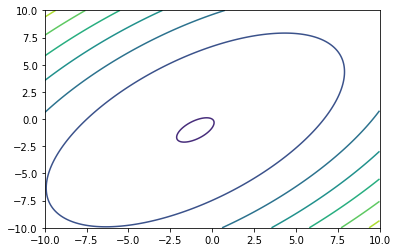

Hessian matrix that organizes all the second partial derivatives of the function 5*x**2 - 6*x*y + 4*x + 5*y**2 + 4*y is :
 [[10 -6]
 [-6 10]]
Determinant in the singular point {x: -1, y: -1} is :
 64
Eigenvalues of the Hessian matrix are :
 [16.  4.]
Eigenvectors of the Hessian matrix are :
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Alpha value is < 0.125
The function is convex and the singular point is a minimum
Gradient of the function 5*x**2 - 6*x*y + 4*x + 5*y**2 + 4*y is :
 [[10*x - 6*y + 4]
 [-6*x + 10*y + 4]]
Singular point of the function 5*x**2 - 6*x*y + 4*x + 5*y**2 + 4*y is :
 {x: -1, y: -1}
Determinant of the function 5*x**2 - 6*x*y + 4*x + 5*y**2 + 4*y is :
 64
Center of contour with grad=0 is :
 {x: -1, y: -1}


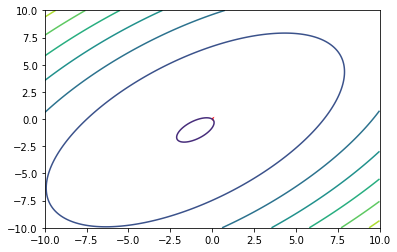

Trajectory of the steepest descent algorithm is :
 [[-1, -2.5], [matrix([[-0.1*x + 0.06*y - 1.04]], dtype=object), matrix([[0.06*x - 0.1*y - 2.54]], dtype=object)], [matrix([[-0.2*x + 0.12*y - 1.08]], dtype=object), matrix([[0.12*x - 0.2*y - 2.58]], dtype=object)], [matrix([[-0.3*x + 0.18*y - 1.12]], dtype=object), matrix([[0.18*x - 0.3*y - 2.62]], dtype=object)], [matrix([[-0.4*x + 0.24*y - 1.16]], dtype=object), matrix([[0.24*x - 0.4*y - 2.66]], dtype=object)], [matrix([[-0.5*x + 0.3*y - 1.2]], dtype=object), matrix([[0.3*x - 0.5*y - 2.7]], dtype=object)], [matrix([[-0.6*x + 0.36*y - 1.24]], dtype=object), matrix([[0.36*x - 0.6*y - 2.74]], dtype=object)], [matrix([[-0.7*x + 0.42*y - 1.28]], dtype=object), matrix([[0.42*x - 0.7*y - 2.78]], dtype=object)], [matrix([[-0.8*x + 0.48*y - 1.32]], dtype=object), matrix([[0.48*x - 0.8*y - 2.82]], dtype=object)], [matrix([[-0.9*x + 0.54*y - 1.36]], dtype=object), matrix([[0.54*x - 0.9*y - 2.86]], dtype=object)], [matrix([[-1.0*x + 0.6*y - 1.4]

In [ ]:
import numpy as np
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, log

def f(x,y):
    return 5*x**2 - 6*x*y + 5*y**2 + 4*x + 4*y

x = np.linspace(-10,10,1000)
y = np.linspace(-10,10,1000)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)
plt.contour(X,Y,Z)
plt.show()


def partial(element, function):
	"""
	partial : sympy.core.symbol.Symbol * sympy.core.add.Add -> sympy.core.add.Add
	partial(element, function) Performs partial derivative of a function of several variables is its derivative with respect to one of those variables, with the others held constant. Return partial_diff.
	"""
	partial_diff = function.diff(element)

	return partial_diff


def gradient(partials):
	"""
	gradient : List[sympy.core.add.Add] -> numpy.matrix
	gradient(partials) Transforms a list of sympy objects into a numpy matrix. Return grad.
	"""
	grad = np.matrix([[partials[0]], [partials[1]]])

	return grad

def gradient_to_zero(symbols_list, partials):
	"""
	gradient_to_zero : List[sympy.core.symbol.Symbol] * List[sympy.core.add.Add] -> Dict[sympy.core.numbers.Float]
	gradient_to_zero(symbols_list, partials) Solve the null equation for each variable, and determine the pair of coordinates of the singular point. Return singular.
	"""
	partial_x = Eq(partials[0], 0)
	partial_y = Eq(partials[1], 0)

	singular = solve((partial_x, partial_y), (symbols_list[0], symbols_list[1]))

	return singular

def determat(partials_second, cross_derivatives, singular, symbols_list):
	"""
	List[sympy.core.add.Add] * sympy.core.add.Add * Dict[sympy.core.numbers.Float] * List[sympy.core.symbol.Symbol] -> sympy.core.numbers.Float
	determat(partials_second, cross_derivatives, singular, symbols_list) Computes the determinant of the Hessian matrix at the singular point. Return det.
	"""
	det = partials_second[0].subs([(symbols_list[0], singular[symbols_list[0]]), (symbols_list[1], singular[symbols_list[1]])]) * partials_second[1].subs([(symbols_list[0], singular[symbols_list[0]]), (symbols_list[1], singular[symbols_list[1]])]) - (cross_derivatives.subs([(symbols_list[0], singular[symbols_list[0]]), (symbols_list[1], singular[symbols_list[1]])]))**2

	return det

def hessian(partials_second, cross_derivatives):
	"""
	hessian : List[sympy.core.add.Add] * sympy.core.add.Add -> numpy.matrix
	hessian(partials_second, cross_derivatives) Transforms a list of sympy objects into a numpy hessian matrix. Return hessianmat.
	"""
	hessianmat = np.matrix([[partials_second[0], cross_derivatives], [cross_derivatives, partials_second[1]]])

	return hessianmat

x, y = symbols('x y')
symbols_list = [x, y]
function = 5*x**2 - 6*x*y + 5*y**2 + 4*x + 4*y 
partials, partials_second = [], []

for element in symbols_list:
  partial_diff = partial(element, function)
  partials.append(partial_diff)

grad = gradient(partials)
singular = gradient_to_zero(symbols_list, partials)

cross_derivatives = partial(symbols_list[0], partials[1])

for i in range(0, len(symbols_list)):
  partial_diff = partial(symbols_list[i], partials[i])
  partials_second.append(partial_diff)

hessianmat = hessian(partials_second, cross_derivatives)
det = determat(partials_second, cross_derivatives, singular, symbols_list)

print("Hessian matrix that organizes all the second partial derivatives of the function {0} is :\n {1}".format(function, hessianmat))
print("Determinant in the singular point {0} is :\n {1}".format(singular, det))

# Calculate the eigenvalues and eigenvectors of hessianmat
hessian = np.array(hessianmat, dtype=float)
eigenvalues, eigenvectors = np.linalg.eig(hessian)
print("Eigenvalues of the Hessian matrix are :\n {0}".format(eigenvalues))
print("Eigenvectors of the Hessian matrix are :\n {0}".format(eigenvectors))
alpha = 2 / max(eigenvalues)

# print alpha value 
print("Alpha value is < {0}".format(alpha))

if det > 0:    
    if eigenvalues[0] > 0 and eigenvalues[1] > 0:
        print("The function is convex and the singular point is a minimum")
    elif eigenvalues[0] < 0 and eigenvalues[1] < 0:
        print("The function is concave and the singular point is a maximum")
    else:
        print("The function is neither convex nor concave and the singular point is a saddle point")
        
elif det < 0:
    print("The function is neither convex nor concave and the singular point is a saddle point")    
elif det == 0:
    
    if eigenvalues[0] > 0 and eigenvalues[1] > 0:
        print("The function is convex and the singular point is a minimum")
    elif eigenvalues[0] < 0 and eigenvalues[1] < 0:
        print("The function is concave and the singular point is a maximum")
    else:
        print("The function is neither convex nor concave and the singular point is a saddle point")        
else:
    print("The function is neither convex nor concave and the singular point is a saddle point")
    
# print gradient of the function 
print("Gradient of the function {0} is :\n {1}".format(function, grad))

# print singular point of the function
print("Singular point of the function {0} is :\n {1}".format(function, singular))

# print determinant of the function
print("Determinant of the function {0} is :\n {1}".format(function, det))

# print center of contour with grad=0 
print("Center of contour with grad=0 is :\n {0}".format(singular))

# Contour plot with eigenvectors as arrows:
plt.contour(X,Y,Z)
plt.quiver(0,0,eigenvectors[0,0],eigenvectors[1,0],color='red',scale=100)
plt.quiver(0,0,eigenvectors[0,1],eigenvectors[1,1],color='red',scale=100)
plt.show()

# Sketch the trajectory of the steepest descent algorithm on the contour plot of part (i) if the initial guess is [-1 -2.5]T. learning rate = 0.01
def steepest_descent(x0, y0, learning_rate, function, symbols_list, partials, partials_second, cross_derivatives, singular, det):
    """
    steepest_descent : sympy.core.numbers.Float * sympy.core.numbers.Float * sympy.core.numbers.Float * sympy.core.add.Add * List[sympy.core.symbol.Symbol] * List[sympy.core.add.Add] * List[sympy.core.add.Add] * sympy.core.add.Add * Dict[sympy.core.numbers.Float] * sympy.core.numbers.Float -> List[sympy.core.numbers.Float]
    steepest_descent(x0, y0, learning_rate, function, symbols_list, partials, partials_second, cross_derivatives, singular, det) Computes the trajectory of the steepest descent algorithm. Return trajectory.
    """
    trajectory = []
    x, y = symbols_list[0], symbols_list[1]
    x1, y1 = x0, y0
    trajectory.append([x1, y1])
    grad = gradient(partials)
    for i in range(0, 100):
      x1 = x1 - learning_rate * grad[0]
      y1 = y1 - learning_rate * grad[1]
      trajectory.append([x1, y1])
    return trajectory

x0, y0 = -1, -2.5
learning_rate = 0.01
trajectory = steepest_descent(x0, y0, learning_rate, function, symbols_list, partials, partials_second, cross_derivatives, singular, det)

print("Trajectory of the steepest descent algorithm is :\n {0}".format(trajectory))

### Convert F(x) to standard form of qudratic form

In [ ]:
# Convert F(x) to standard form of qudratic form: 0.5*xT*A*x + dT*x + c

# Define variables
x1, x2 = sp.symbols('x1 x2')

# Define function
f = (x1 + x2) ** 4 - 12 * x1 * x2 + x1 + x2 + 1

# Define gradient
grad = sp.Matrix([sp.diff(f, x1), sp.diff(f, x2)])

# Define Hessian
hess = sp.Matrix([[sp.diff(f, x1, x1), sp.diff(f, x1, x2)],
                  [sp.diff(f, x2, x1), sp.diff(f, x2, x2)]])
print('Gradient: ', grad)
print('Hessian: ', hess)

# calculate and print stationary points
print('Stationary points: ', sp.solve(grad))
# calculate and print critical points
print('Critical points: ', sp.solve(hess))

# Convert to standard form
A = 0.5 * hess
d = grad
# c = f - 0.5 * grad.T * hess * grad

# Convert to numpy array
# A = np.array(A, dtype=np.float64).flatten()
# d = np.array(d, dtype=np.float64).flatten()

# Print results
print('A: ', A)
print('d: ', d)
# print('c: ', c)

Gradient:  Matrix([[-12*x2 + 4*(x1 + x2)**3 + 1], [-12*x1 + 4*(x1 + x2)**3 + 1]])
Hessian:  Matrix([[12*(x1 + x2)**2, 12*((x1 + x2)**2 - 1)], [12*((x1 + x2)**2 - 1), 12*(x1 + x2)**2]])
Stationary points:  [{x1: -(1 + 2*(1 + sqrt(7)*I)**(1/3) + sqrt(7)*I)/(4*(1 + sqrt(7)*I)**(2/3)), x2: -(27/64 + 27*sqrt(7)*I/64)**(1/3)/3 - 3/(8*(27/64 + 27*sqrt(7)*I/64)**(1/3))}, {x1: (-1 - sqrt(7)*I - sqrt(3)*I*(1 + sqrt(7)*I)**(1/3) + (1 + sqrt(7)*I)**(1/3))/((-1 + sqrt(3)*I)**2*(1 + sqrt(7)*I)**(2/3)), x2: -(-1/2 + sqrt(3)*I/2)*(27/64 + 27*sqrt(7)*I/64)**(1/3)/3 - 3/(8*(-1/2 + sqrt(3)*I/2)*(27/64 + 27*sqrt(7)*I/64)**(1/3))}, {x1: (-1 - sqrt(7)*I + (1 + sqrt(7)*I)**(1/3) + sqrt(3)*I*(1 + sqrt(7)*I)**(1/3))/((1 + sqrt(3)*I)**2*(1 + sqrt(7)*I)**(2/3)), x2: -3/(8*(-1/2 - sqrt(3)*I/2)*(27/64 + 27*sqrt(7)*I/64)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(27/64 + 27*sqrt(7)*I/64)**(1/3)/3}]
Critical points:  []
A:  Matrix([[6.0*(x1 + x2)**2, 6.0*(x1 + x2)**2 - 6.0], [6.0*(x1 + x2)**2 - 6.0, 6.0*(x1 + x2)**2]])
d:  Mat

## E

### E8.4

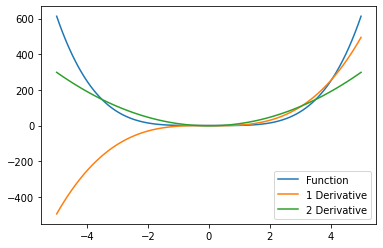

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve

def fun(x):
    return x**4-0.5*x**2+1

def deriv1(x):
    return 4*x**3-x

def deriv2(x):
    return 12*x**2-1

x = np.linspace(-5,5,100)
y = fun(x)
y1 = deriv1(x)
y2 = deriv2(x)

plt.plot(x,y, label="Function")
plt.plot(x,y1, label="1 Derivative")
plt.plot(x,y2, label="2 Derivative")
plt.legend()
plt.show()

Stationary points:  [0.]
Stationary points:  [0.]


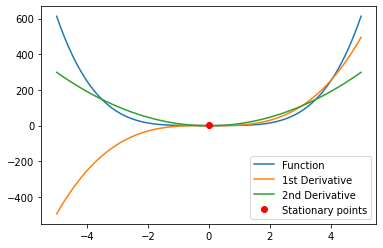

Stationary points:  [0.]
Stationary point  0.0  is a local maximum


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve

def fun(x):
    return x**4-0.5*x**2+1

def deriv1(x):
    return 4*x**3-x

def deriv2(x):
    return 12*x**2-1

x = np.linspace(-5,5,100)
y = fun(x)
y1 = deriv1(x)
y2 = deriv2(x)

# calculate and print stationary points
def find_stationary_points():
    stationary_points = fsolve(deriv1, 0)
    print("Stationary points: ", stationary_points)
    return stationary_points

# Print type of stationary points (local minima, local maxima, saddle point)
def find_stationary_points_type(stationary_points):
    for i in stationary_points:
        if deriv2(i) > 0:
            print("Stationary point ", i, " is a local minimum")
        elif deriv2(i) < 0:
            print("Stationary point ", i, " is a local maximum")
        else:
            print("Stationary point ", i, " is a saddle point")
            
# Plot the function and its derivatives and stationary points and their types on the same graph
def plot_function():
    plt.plot(x, y, label="Function")
    plt.plot(x, y1, label="1st Derivative")
    plt.plot(x, y2, label="2nd Derivative")
    plt.plot(find_stationary_points(), fun(find_stationary_points()), 'ro', label="Stationary points")
    plt.legend()
    plt.show()
    
plot_function()
find_stationary_points_type(find_stationary_points())

In [ ]:
deriv1(x)

array([-4.95000000e+02, -4.65406040e+02, -4.37011710e+02, -4.09792275e+02,
       -3.83723002e+02, -3.58779155e+02, -3.34935999e+02, -3.12168801e+02,
       -2.90452824e+02, -2.69763336e+02, -2.50075600e+02, -2.31364883e+02,
       -2.13606450e+02, -1.96775566e+02, -1.80847496e+02, -1.65797507e+02,
       -1.51600862e+02, -1.38232828e+02, -1.25668670e+02, -1.13883653e+02,
       -1.02853043e+02, -9.25521051e+01, -8.29561043e+01, -7.40403061e+01,
       -6.57799761e+01, -5.81503794e+01, -5.11267815e+01, -4.46844478e+01,
       -3.87986435e+01, -3.34446341e+01, -2.85976848e+01, -2.42330611e+01,
       -2.03260284e+01, -1.68518519e+01, -1.37857970e+01, -1.11031290e+01,
       -8.77911345e+00, -6.78901555e+00, -5.10810070e+00, -3.71163425e+00,
       -2.57488156e+00, -1.67310798e+00, -9.81578874e-01, -4.75559596e-01,
       -1.30315501e-01,  7.88880541e-02,  1.76785712e-01,  1.88112118e-01,
        1.37601914e-01,  4.99897454e-02, -4.99897454e-02, -1.37601914e-01,
       -1.88112118e-01, -

### E8.4

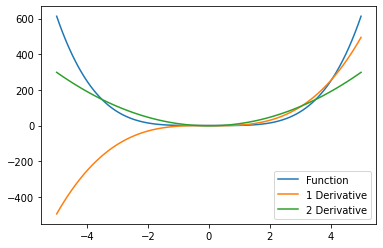

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fsolve

def fun(x):
    return x**4-0.5*x**2+1

def deriv1(x):
    return 4*x**3-x

def deriv2(x):
    return 12*x**2-1

x = np.linspace(-5,5,100)
y = fun(x)
y1 = deriv1(x)
y2 = deriv2(x)

plt.plot(x,y, label="Function")
plt.plot(x,y1, label="1 Derivative")
plt.plot(x,y2, label="2 Derivative")
plt.legend()
plt.show()

# Chapter 9

## E9.2

[0.24998477 0.24998477]


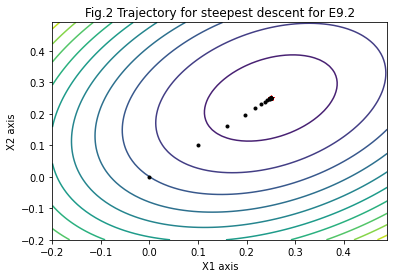

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# %--- Part(i)
X, Y = np.meshgrid(np.arange(-0.2, 0.5, 0.01), np.arange(-0.2, 0.5, 0.01))
F = 3*(X**2+Y**2) - 2*X*Y - X - Y
N = 10
x0 = np.array([.25, .25])
fig = plt.figure()
plt.plot(x0[0], x0[1],'r*')
# plt.hold(True)
plt.contour(X,Y,F,N)
plt.title('Fig.2 Trajectory for steepest descent for E9.2')
plt.xlabel('X1 axis'), plt.ylabel('X2 axis')
# %---

A = np.array([[6, -2], [-2, 6]])
d = np.array([-1, -1])
alfa = 0.1

# Find the eigenvalues and eigenvecors of Hessian matrix
D, V = np.linalg.eig(A)

iter = 0
x = np.array([0, 0])   # Initialize x

# Find the stationary point
G = np.dot(A, x) + d
small = np.array([1.0e-4, 1.0e-4])

while (abs(G[0]) >= small[0] or abs(G[1])>= small[1]):
    plt.plot(x[0], x[1],'k.')
    x = x - alfa * G
    G = np.dot(A, x) + d
    iter = iter + 1
    if (iter == 2):
        x2 = x   # Output the x value after two iterations
print(x)   # Output the stationary point
# plt.hold(False)
plt.show()

[-inf -inf]


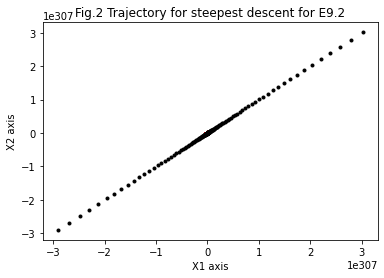

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# %--- Part(i)
X, Y = np.meshgrid(np.arange(-0.2, 0.5, 0.01), np.arange(-0.2, 0.5, 0.01))
F = 3*(X**2+Y**2) - 2*X*Y - X - Y
N = 10
x0 = np.array([.25, .25])
fig = plt.figure()
plt.plot(x0[0], x0[1],'r*')
# plt.hold(True)
plt.contour(X,Y,F,N)
plt.title('Fig.2 Trajectory for steepest descent for E9.2')
plt.xlabel('X1 axis'), plt.ylabel('X2 axis')
# %---

A = np.array([[6, -2], [-2, 6]])
d = np.array([-1, -1])
alfa = 0.51

# Find the eigenvalues and eigenvecors of Hessian matrix
D, V = np.linalg.eig(A)

iter = 0
x = np.array([0, 0])   # Initialize x

# Find the stationary point
G = np.dot(A, x) + d
small = np.array([1.0e-4, 1.0e-4])

while (abs(G[0]) >= small[0] or abs(G[1])>= small[1]):
    plt.plot(x[0], x[1],'k.')
    x = x - alfa * G
    G = np.dot(A, x) + d
    iter = iter + 1
    if (iter == 2):
        x2 = x   # Output the x value after two iterations
print(x)   # Output the stationary point
# plt.hold(False)
plt.show()

Minimum Point = [0.25 0.25]


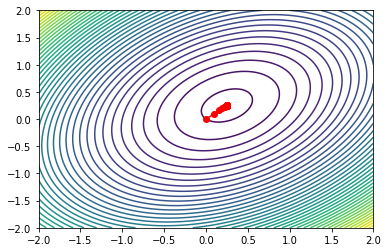

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def F(x):
    return 3*x[0]**2 - 2*x[0]*x[1] + 3*x[1]**2 - x[0] - x[1]

def gradF(x):
    return np.array([6*x[0] - 2*x[1] - 1, 6*x[0] - 2*x[1] - 1])

def hessF(x):
    return np.array([[6, -2], [-2, 6]])

def steepest_descent(x0, alpha, max_iter):
    x = x0
    x_list = [x0]
    for i in range(max_iter):
        x = x - alpha*gradF(x)
        x_list.append(x)
    return x_list

def plot_contour(x_list):
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)
    Z = F([X, Y])
    plt.contour(X, Y, Z, 50)
    plt.plot([x[0] for x in x_list], [x[1] for x in x_list], 'r-o')
    plt.show()
    
if __name__ == '__main__':
    x0 = np.array([0, 0])
    alpha = 0.1
    max_iter = 100
    x_list = steepest_descent(x0, alpha, max_iter)
    print("Minimum Point = {0}".format(x_list[-1]))
    plot_contour(x_list)

<ipython-input-23-8f4373f1eaa2>:10: RuntimeWarning: overflow encountered in double_scalars
  return np.array([6*x[0] - 2*x[1] - 1, 6*x[0] - 2*x[1] - 1])
<ipython-input-23-8f4373f1eaa2>:10: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([6*x[0] - 2*x[1] - 1, 6*x[0] - 2*x[1] - 1])


[-inf -inf]


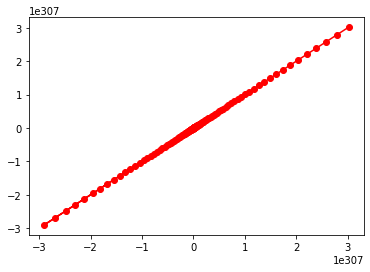

In [ ]:
# CONSIDER INITIAL GUESS of x0=[-1 2.5]T and Sketch the trajectory of the steepest descent algorithm on the contour plot of function: F(x) = 5*x**2 - 6*x*y + 5*y**2 + 4*x + 4*y

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 3*x[0]**2 - 2*x[0]*x[1] + 3*x[1]**2 - x[0] - x[1]

def grad_f(x):
    return np.array([6*x[0] - 2*x[1] - 1, 6*x[0] - 2*x[1] - 1])

def steepest_descent(x0, alpha, eps):
    x = x0
    x_list = [x]
    while np.linalg.norm(grad_f(x)) > eps:
        x = x - alpha * grad_f(x)
        x_list.append(x)
    return x, x_list

def plot_contour(x_list):
    x1 = np.linspace(-2, 2, 100)
    x2 = np.linspace(-2, 2, 100)
    X1, X2 = np.meshgrid(x1, x2)
    F = f([X1, X2])
    plt.contour(X1, X2, F, 100)
    plt.plot(x_list[:,0], x_list[:,1], 'o-', color='red')
    plt.show()
    
if __name__ == '__main__':
    x0 = np.array([0, 0])
    alpha = 0.51
    eps = 1e-6
    x, x_list = steepest_descent(x0, alpha, eps)
    print(x)
    x_list = np.array(x_list)
    plot_contour(x_list)

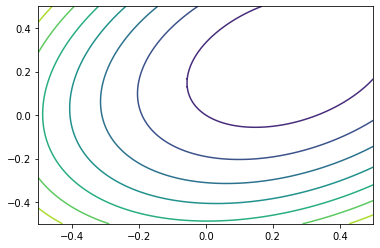

Hessian matrix that organizes all the second partial derivatives of the function 3*x**2 - 2*x*y - x + 3*y**2 - y is :
 [[6 -2]
 [-2 6]]
Determinant in the singular point {x: 1/4, y: 1/4} is :
 32
Eigenvalues of the Hessian matrix are :
 [8. 4.]
Eigenvectors of the Hessian matrix are :
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Alpha value is < 0.25
The function is convex and the singular point is a minimum
Gradient of the function 3*x**2 - 2*x*y - x + 3*y**2 - y is :
 [[6*x - 2*y - 1]
 [-2*x + 6*y - 1]]
Singular point of the function 3*x**2 - 2*x*y - x + 3*y**2 - y is :
 {x: 1/4, y: 1/4}
Determinant of the function 3*x**2 - 2*x*y - x + 3*y**2 - y is :
 32
Center of contour with grad=0 is :
 {x: 1/4, y: 1/4}


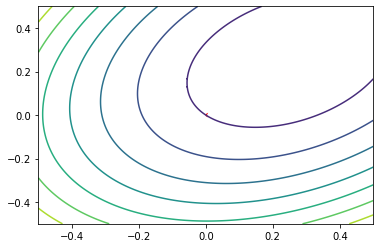

Trajectory of the steepest descent algorithm is :
 [[0, 0], [matrix([[-0.06*x + 0.02*y + 0.01]], dtype=object), matrix([[0.02*x - 0.06*y + 0.01]], dtype=object)], [matrix([[-0.12*x + 0.04*y + 0.02]], dtype=object), matrix([[0.04*x - 0.12*y + 0.02]], dtype=object)], [matrix([[-0.18*x + 0.06*y + 0.03]], dtype=object), matrix([[0.06*x - 0.18*y + 0.03]], dtype=object)], [matrix([[-0.24*x + 0.08*y + 0.04]], dtype=object), matrix([[0.08*x - 0.24*y + 0.04]], dtype=object)], [matrix([[-0.3*x + 0.1*y + 0.05]], dtype=object), matrix([[0.1*x - 0.3*y + 0.05]], dtype=object)], [matrix([[-0.36*x + 0.12*y + 0.06]], dtype=object), matrix([[0.12*x - 0.36*y + 0.06]], dtype=object)], [matrix([[-0.42*x + 0.14*y + 0.07]], dtype=object), matrix([[0.14*x - 0.42*y + 0.07]], dtype=object)], [matrix([[-0.48*x + 0.16*y + 0.08]], dtype=object), matrix([[0.16*x - 0.48*y + 0.08]], dtype=object)], [matrix([[-0.54*x + 0.18*y + 0.09]], dtype=object), matrix([[0.18*x - 0.54*y + 0.09]], dtype=object)], [matrix([[-0.6*x 

In [ ]:
import numpy as np
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, log

def f(x,y):
    return 3*x**2 - 2*x*y + 3*y**2 - x - y

x = np.linspace(-2.5,2.5,1000)
y = np.linspace(-2.5,2.5,1000)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)
plt.contour(X,Y,Z)
plt.show()


def partial(element, function):
	"""
	partial : sympy.core.symbol.Symbol * sympy.core.add.Add -> sympy.core.add.Add
	partial(element, function) Performs partial derivative of a function of several variables is its derivative with respect to one of those variables, with the others held constant. Return partial_diff.
	"""
	partial_diff = function.diff(element)

	return partial_diff


def gradient(partials):
	"""
	gradient : List[sympy.core.add.Add] -> numpy.matrix
	gradient(partials) Transforms a list of sympy objects into a numpy matrix. Return grad.
	"""
	grad = np.matrix([[partials[0]], [partials[1]]])

	return grad

def gradient_to_zero(symbols_list, partials):
	"""
	gradient_to_zero : List[sympy.core.symbol.Symbol] * List[sympy.core.add.Add] -> Dict[sympy.core.numbers.Float]
	gradient_to_zero(symbols_list, partials) Solve the null equation for each variable, and determine the pair of coordinates of the singular point. Return singular.
	"""
	partial_x = Eq(partials[0], 0)
	partial_y = Eq(partials[1], 0)

	singular = solve((partial_x, partial_y), (symbols_list[0], symbols_list[1]))

	return singular

def determat(partials_second, cross_derivatives, singular, symbols_list):
	"""
	List[sympy.core.add.Add] * sympy.core.add.Add * Dict[sympy.core.numbers.Float] * List[sympy.core.symbol.Symbol] -> sympy.core.numbers.Float
	determat(partials_second, cross_derivatives, singular, symbols_list) Computes the determinant of the Hessian matrix at the singular point. Return det.
	"""
	det = partials_second[0].subs([(symbols_list[0], singular[symbols_list[0]]), (symbols_list[1], singular[symbols_list[1]])]) * partials_second[1].subs([(symbols_list[0], singular[symbols_list[0]]), (symbols_list[1], singular[symbols_list[1]])]) - (cross_derivatives.subs([(symbols_list[0], singular[symbols_list[0]]), (symbols_list[1], singular[symbols_list[1]])]))**2

	return det

def hessian(partials_second, cross_derivatives):
	"""
	hessian : List[sympy.core.add.Add] * sympy.core.add.Add -> numpy.matrix
	hessian(partials_second, cross_derivatives) Transforms a list of sympy objects into a numpy hessian matrix. Return hessianmat.
	"""
	hessianmat = np.matrix([[partials_second[0], cross_derivatives], [cross_derivatives, partials_second[1]]])

	return hessianmat

x, y = symbols('x y')
symbols_list = [x, y]
function = 3*x**2 - 2*x*y + 3*y**2 - x - y
partials, partials_second = [], []

for element in symbols_list:
  partial_diff = partial(element, function)
  partials.append(partial_diff)

grad = gradient(partials)
singular = gradient_to_zero(symbols_list, partials)

cross_derivatives = partial(symbols_list[0], partials[1])

for i in range(0, len(symbols_list)):
  partial_diff = partial(symbols_list[i], partials[i])
  partials_second.append(partial_diff)

hessianmat = hessian(partials_second, cross_derivatives)
det = determat(partials_second, cross_derivatives, singular, symbols_list)

print("Hessian matrix that organizes all the second partial derivatives of the function {0} is :\n {1}".format(function, hessianmat))
print("Determinant in the singular point {0} is :\n {1}".format(singular, det))

# Calculate the eigenvalues and eigenvectors of hessianmat
hessian = np.array(hessianmat, dtype=float)
eigenvalues, eigenvectors = np.linalg.eig(hessian)
print("Eigenvalues of the Hessian matrix are :\n {0}".format(eigenvalues))
print("Eigenvectors of the Hessian matrix are :\n {0}".format(eigenvectors))
alpha = 2 / max(eigenvalues)

# print alpha value 
print("Alpha value is < {0}".format(alpha))

if det > 0:    
    if eigenvalues[0] > 0 and eigenvalues[1] > 0:
        print("The function is convex and the singular point is a minimum")
    elif eigenvalues[0] < 0 and eigenvalues[1] < 0:
        print("The function is concave and the singular point is a maximum")
    else:
        print("The function is neither convex nor concave and the singular point is a saddle point")
        
elif det < 0:
    print("The function is neither convex nor concave and the singular point is a saddle point")    
elif det == 0:
    
    if eigenvalues[0] > 0 and eigenvalues[1] > 0:
        print("The function is convex and the singular point is a minimum")
    elif eigenvalues[0] < 0 and eigenvalues[1] < 0:
        print("The function is concave and the singular point is a maximum")
    else:
        print("The function is neither convex nor concave and the singular point is a saddle point")        
else:
    print("The function is neither convex nor concave and the singular point is a saddle point")
    
# print gradient of the function 
print("Gradient of the function {0} is :\n {1}".format(function, grad))

# print singular point of the function
print("Singular point of the function {0} is :\n {1}".format(function, singular))

# print determinant of the function
print("Determinant of the function {0} is :\n {1}".format(function, det))

# print center of contour with grad=0 
print("Center of contour with grad=0 is :\n {0}".format(singular))

# Contour plot with eigenvectors as arrows:
plt.contour(X,Y,Z)
plt.quiver(0,0,eigenvectors[0,0],eigenvectors[1,0],color='red',scale=100)
plt.quiver(0,0,eigenvectors[0,1],eigenvectors[1,1],color='red',scale=100)
plt.show()

# Sketch the trajectory of the steepest descent algorithm on the contour plot of part (i) if the initial guess is [-1 -2.5]T. learning rate = 0.01
def steepest_descent(x0, y0, learning_rate, function, symbols_list, partials, partials_second, cross_derivatives, singular, det):
    """
    steepest_descent : sympy.core.numbers.Float * sympy.core.numbers.Float * sympy.core.numbers.Float * sympy.core.add.Add * List[sympy.core.symbol.Symbol] * List[sympy.core.add.Add] * List[sympy.core.add.Add] * sympy.core.add.Add * Dict[sympy.core.numbers.Float] * sympy.core.numbers.Float -> List[sympy.core.numbers.Float]
    steepest_descent(x0, y0, learning_rate, function, symbols_list, partials, partials_second, cross_derivatives, singular, det) Computes the trajectory of the steepest descent algorithm. Return trajectory.
    """
    trajectory = []
    x, y = symbols_list[0], symbols_list[1]
    x1, y1 = x0, y0
    trajectory.append([x1, y1])
    grad = gradient(partials)
    for i in range(0, 100):
      x1 = x1 - learning_rate * grad[0]
      y1 = y1 - learning_rate * grad[1]
      trajectory.append([x1, y1])
    return trajectory

x0, y0 = 0, 0
learning_rate = 0.01
trajectory = steepest_descent(x0, y0, learning_rate, function, symbols_list, partials, partials_second, cross_derivatives, singular, det)

print("Trajectory of the steepest descent algorithm is :\n {0}".format(trajectory))

# Convert F(x) to standard form of qudratic form: 0.5*xT*A*x + dT*x + c

# Define variables
x1, x2 = sp.symbols('x1 x2')

# Define function
f = 3*x1**2 - 2*x1*x2 + 3*x2**2 - x1 - x2

# Define gradient
grad = sp.Matrix([sp.diff(f, x1), sp.diff(f, x2)])

# Define Hessian
hess = sp.Matrix([[sp.diff(f, x1, x1), sp.diff(f, x1, x2)],
                  [sp.diff(f, x2, x1), sp.diff(f, x2, x2)]])
print('Gradient: ', grad)
print('Hessian: ', hess)

# calculate and print stationary points
print('Stationary points: ', sp.solve(grad))
# calculate and print critical points
print('Critical points: ', sp.solve(hess))

# Convert to standard form
A = 0.5 * hess
d = grad
# c = f - 0.5 * grad.T * hess * grad

# Convert to numpy array
# A = np.array(A, dtype=np.float64).flatten()
# d = np.array(d, dtype=np.float64).flatten()

# Print results
print('A: ', A)
print('d: ', d)
# print('c: ', c)

### Others9_2

In [ ]:
# x0 = input("Enter an initial point (x0,y0) : ")
# x0 = x0.split(",")
# x0 = [int(x0[0]), int(x0[1])]
# if x0[0] > 0 and x0[1] > 0:
#     x0 = [1, 1]
# elif x0[0] < 0 and x0[1] < 0:
#     x0 = [-1, -1]
# elif x0[0] > 0 and x0[1] < 0:
#     x0 = [1, -1]
# elif x0[0] < 0 and x0[1] > 0:
#     x0 = [-1, 1]
# if x0 == [1, 1]:
#     alpha = 2 / eigenvalues[0]
# elif x0 == [-1, -1]:
#     alpha = 2 / eigenvalues[1]
# elif x0 == [1, -1]:
#     alpha = 2 / eigenvalues[2]
# elif x0 == [-1, 1]:
#     alpha = 2 / eigenvalues[3]
# print("Alpha value is < {0}".format(alpha))

In [ ]:
# # Script get matrix of qudratic form: 0.5*xT*A*x + dT*x + c from user, calculate its gradient and hessian matrix, and Sketch a contour plot of the function

# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# def get_matrix():
#     print("Enter the matrix A, d, and c of quadratic form: 0.5*xT*A*x + dT*x + c")
#     A = np.array([[float(x) for x in input("A = ").split()]])
#     d = np.array([[float(x) for x in input("d = ").split()]])
#     c = float(input("c = "))
#     return A, d, c

# def get_gradient(A, d):
#     return A + d

# def get_hessian(A):
#     return A

# def get_contour_plot(A, d, c):
#     x = np.linspace(-10, 10, 100)
#     y = np.linspace(-10, 10, 100)
#     X, Y = np.meshgrid(x, y)
#     Z = 0.5*(A[0][0]*X**2 + 2*A[0][1]*X*Y + A[1][1]*Y**2) + d[0][0]*X + d[0][1]*Y + c
#     fig = plt.figure()
#     ax = fig.gca(projection='3d')
#     ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_zlabel('z')
#     ax.set_title('Contour plot of the function')
#     plt.show()
        
        
# if __name__ == "__main__":
#     A, d, c = get_matrix()
#     get_contour_plot(A, d, c)
#     # print eigenvalues and eigenvectors of A
#     w, v = np.linalg.eig(A)
#     print("Eigenvalues of A: ", w)
#     print("Eigenvectors of A: ", v)
    
#     # Calculate the direction of the gradient
#     if w[0] > w[1]:
#         print("The direction of the gradient is: ", v[0])
#     else:
#         print("The direction of the gradient is: ", v[1])

In [ ]:
# # Script for qudratic form: 0.5*xT*A*x + dT*x + c (A = [6 -2; -2 6], d[-1 -1], c =0)), calculate its gradient and hessian matrix, and Sketch a contour plot of the function

# import numpy as np
# import matplotlib.pyplot as plt

# # Define the function
# def f(x):
#     A = np.array([[6, -2], [-2, 6]])
#     d = np.array([-1, -1])
#     c = 0
#     return 0.5 * x.T @ A @ x + d.T @ x + c

# # Define the gradient of the function
# def grad_f(x):
#     A = np.array([[6, -2], [-2, 6]])
#     d = np.array([-1, -1])
#     return A @ x + d

# # Define the hessian matrix of the function
# def hess_f(x):
#     return np.array([[6, -2], [-2, 6]])

# # Define the contour plot of the function
# def contour_plot():
#     x = np.linspace(-10, 10, 100)
#     y = np.linspace(-10, 10, 100)
#     X, Y = np.meshgrid(x, y)
#     Z = f(np.array([X, Y]))
#     plt.contour(X, Y, Z, 20)
#     plt.show()
    
# if __name__ == "__main__":
#     x = np.array([1, 1])
#     print("The gradient of the function is: ", grad_f(x))
#     print("The hessian matrix of the function is: ", hess_f(x))
#     contour_plot()
#     # Print eigenvalues of the hessian matrix
#     print("The eigenvalues of the hessian matrix are: ", np.linalg.eigvals(hess_f(x)))
#     # Print eigenvecotrs of the hessian matrix
#     print("The eigenvecotrs of the hessian matrix are: ", np.linalg.eig(hess_f(x))[1])

# E9.10

In [ ]:
# Steepest Descent
# 
# Requires an initial point x - matrix nx1
# Requires a function parameters to the gradient and hessian matrices of the function
# Requires a maximum number of iterations, used to stop if algorithm diverges
# Requires a tolerance for exiting condition
# Requires a mask boolean for whether or not to print out values inbetween iterations

steepest_descent = function(init_point, gradient, hessian, maxIter, tol, mask) {
  
  x = init_point
  
  for(i in 1:maxIter) {
    
    if(!mask) { # if the user does not want print out statements
      print(sprintf("      Iteration: %d", i))
      print("x value:")
      print(x)
    }
    
    g = gradient(x) # find gradient at x
    
    if(!mask) { # if the user does not want print out statements
      print("gradient value:")
      print(g)
    }
    
    # calculate the frobenius norm of the gradient vector evaluated at x
    # remember, stationary points occur when gradient is zero, so we take
    # the square root of the sum of squares of the gradient values and
    # compare to the tolerance
    if(norm(g, "F") < tol) { # convert gradient into single value 
      # through frobenius norm
      print("Stationary Point Found at point:")
      print(x)
      print(sprintf("Iterations taken: %d", i))
      return(x)
    }
    
    # creating the search direction vectors
    p = -g
    
    # Here we have a dynamic learning rate that is minimized against
    # the line of the next iteration
    alpha = -(t(g)%*%p) / (t(p)%*%hessian(x)%*%p) 
    
    x = x - alpha[1]*g # find next x
    
    
  }
  
  print("MAXIMUM ITERATIONS REACHED")
  print("Current point is: ")
  print(x)
  print("Error: ")
  print(abs(norm(g, "F")-tol)) # computing the error 
  return(x)
}


# example function:
# (x+y)^4-12xy+x+y-1
# Has three stationary points
# 1) [-0.65, -0.65]
# 2) [0.5654, 0.564]
# 3) [0.0849, 0.0849]

gradient = function(X) {
  x = X[1,1]
  y = X[2,1]
  g1 = 4*(x+y)^3-12*y+1
  g2 = 4*(x+y)^3-12*x+1
  matrix(c(g1, g2), ncol=1)
}

hessian = function(X) { 
  x = X[1,1]
  y = X[2,1]
  fxx = 12*(x + y)^2
  fxy = 12*(x + y)^2 - 12
  matrix(c(fxx, fxy, fxy, fxx), ncol=2)
}

# initial points
p1 = matrix(c(-1, -1), ncol=1)

# Function call
min = steepest_descent(p1,gradient, hessian, 1000, 1e-10, 1)



[1] "Stationary Point Found at point:"
           [,1]
[1,] -0.6504198
[2,] -0.6504198
[1] "Iterations taken: 7"


In [ ]:

# Newton's Method
# 
# Requires an initial point x - matrix nx1
# Requires a function parameters to the gradient and hessian matrices of the function
# Requires a maximum number of iterations, used to stop if algorithm diverges
# Requires a tolerance for exiting condition
# Requires a mask boolean for whether or not to print out values inbetween iterations

newtons_method = function(init_point, gradient, hessian, maxIter, tol, mask) {
  
  
  x = init_point
  
  
  for(i in 1:maxIter) {
    
    if(!mask) { # if the user does not want print out statements
      print(sprintf("      Iteration: %d", i))
      print("x value:")
      print(x)
    }
    
    A = hessian(x)
    g = gradient(x)
    x = x - solve(A)%*%g # solve means inverse, A^-1
    
    if(!mask) { # if the user does not want print out statements
      print("gradient value:")
      print(g)
    }
    
    # calculate the frobenius norm of the gradient vector evaluated at x
    # remember, stationary points occur when gradient is zero, so we take
    # the square root of the sum of squares of the gradient values and
    # compare to the tolerance
    if(norm(g, "F") < tol) { # convert gradient into single value 
      # through frobenius norm
      print("Stationary Point Found at point:")
      print(x)
      print(sprintf("Iterations taken: %d", i))
      return(x)
    }
  }
  
  print("MAXIMUM ITERATIONS REACHED")
  print("Current point is: ")
  print(x)
  print("Error: ")
  print(abs(norm(g, "F")-tol)) # computing the error 
  return(x)
}


# example function:
# (x+y)^4-12xy+x+y-1
# Has three stationary points
# 1) [-0.65, -0.65]
# 2) [0.5654, 0.564]
# 3) [0.0849, 0.0849]

gradient = function(X) {
  x = X[1,1]
  y = X[2,1]
  g1 = 4*(x+y)^3-12*y+1
  g2 = 4*(x+y)^3-12*x+1
  matrix(c(g1, g2), ncol=1)
}

hessian = function(X) { 
  x = X[1,1]
  y = X[2,1]
  fxx = 12*(x + y)^2
  fxy = 12*(x + y)^2 - 12
  matrix(c(fxx, fxy, fxy, fxx), ncol=2)
}

# initial points
p1 = matrix(c(-1, -1), ncol=1)

# Function call
min = newtons_method(p1,gradient, hessian, 1000, 1e-10, 1)



[1] "Stationary Point Found at point:"
           [,1]
[1,] -0.6504198
[2,] -0.6504198
[1] "Iterations taken: 7"


In [ ]:

# Conjugate Gradient method
# 
# Requires an initial point x - matrix nx1
# Requires a function parameters to the gradient and hessian matrices of the function
# Requires a maximum number of iterations, used to stop if algorithm diverges
# Requires a tolerance for exiting condition
# Requires a mask boolean for whether or not to print out values inbetween iterations
# Requires a value ranging from 1,2,3 for the type of beta method 

conjuage_gradient = function(init_point, gradient, hessian, maxIter, tol, mask, betaMethod) {
  
  x = init_point
  
  for(i in 1:maxIter) {
    
    if(!mask) { # if the user does not want print out statements
      print(sprintf("      Iteration: %d", i))
      print("x value:")
      print(x)
    }
    
    g = gradient(x) # find gradient at x
    
    if(!mask) { # if the user does not want print out statements
      print("gradient value:")
      print(g)
    }
    
    # calculate the frobenius norm of the gradient vector evaluated at x
    # remember, stationary points occur when gradient is zero, so we take
    # the square root of the sum of squares of the gradient values and
    # compare to the tolerance
    if(norm(g, "F") < tol) { # convert gradient into single value 
      # through frobenius norm
      print("Stationary Point Found at point:")
      print(x)
      print(sprintf("Iterations taken: %d", i))
      return(x)
    }
    
    # creating the search direction vectors
    if(i==1) { # first search direction
      p = -g
    }
    else { # use beta
      if(betaMethod == 1) { # Common choice
        beta = (t(g-g0)%*%g)/(t(g0)%*%p)
      }
      else if (betaMethod == 2) { # hestens and stiefel
        beta = (t(g)%*%g)/(t(g0)%*%g)
      }
      else { # Fletcher and Reeves
        beta = (t(g-g0)%*%g)/(t(g0)%*%g0)
      }
      
      if(!mask) { # if the user does not want print out statements
        print("beta value:")
        print(beta)
      }
      
      p = -g+beta[1]*p
    }
    
    
    alpha = -(t(g)%*%p) / (t(p)%*%hessian(x)%*%p) # learning rate
    x = x - alpha[1]*g # find next x
    
    g0 = g # update previous gradient to current
  }
  
  print("MAXIMUM ITERATIONS REACHED")
  print("Current point is: ")
  print(x)
  print("Error: ")
  print(abs(norm(g, "F")-tol)) # computing the error 
  return(x)
}

# example function:
# (x+y)^4-12xy+x+y-1
# Has three stationary points
# 1) [-0.65, -0.65]
# 2) [0.5654, 0.564]
# 3) [0.0849, 0.0849]

gradient = function(X) {
  x = X[1,1]
  y = X[2,1]
  g1 = 4*(x+y)^3-12*y+1
  g2 = 4*(x+y)^3-12*x+1
  matrix(c(g1, g2), ncol=1)
}

hessian = function(X) { 
  x = X[1,1]
  y = X[2,1]
  fxx = 12*(x + y)^2
  fxy = 12*(x + y)^2 - 12
  matrix(c(fxx, fxy, fxy, fxx), ncol=2)
}

# initial points
p1 = matrix(c(-1, -1), ncol=1)

# Function call
min = conjuage_gradient(p1,gradient, hessian, 1000, 1e-10, 1,1)



[1] "Stationary Point Found at point:"
           [,1]
[1,] -0.6504198
[2,] -0.6504198
[1] "Iterations taken: 29"


In [ ]:
A = matrix(c(20.305, 8.305, 8.305, 20.305), ncol=2)
eigen(A)


eigen() decomposition
$values
[1] 28.61 12.00

$vectors
          [,1]       [,2]
[1,] 0.7071068 -0.7071068
[2,] 0.7071068  0.7071068


In [ ]:
A = matrix(c(0.3468, -11.6532, -11.6532, 0.3468), ncol=2)
eigen(A)


eigen() decomposition
$values
[1]  12.0000 -11.3064

$vectors
           [,1]       [,2]
[1,] -0.7071068 -0.7071068
[2,]  0.7071068 -0.7071068


In [ ]:
A = matrix(c(15.35, 3.35,3.35, 15.35), ncol=2)
eigen(A)


eigen() decomposition
$values
[1] 18.7 12.0

$vectors
          [,1]       [,2]
[1,] 0.7071068 -0.7071068
[2,] 0.7071068  0.7071068
